# Práctica 11 - Esturcturas de Datos y Algoritmos I

### Recursividad.

#### ¿Qué es una función recursiva?

Una función recursiva es aquella que se llama a sí misma con instancias más pequeñas, con el fin de computar datos de manera recursiva, la intención de generar instancias más pequeñas es llegar a uno de nuestros llamados casos base de la función, que es la instancia mínima, que devolverá a las funciones llamadas previamente para poder obtener una salida al caso específico.

Esto en memoria, se apila una encima de la otra, por lo que aparte de complejidad temporal, nos consume memoria, y un manejo poco óptimo de la función nos puede llevar a un desbordamiento de pila.

#### Algoritmo para comprobar si dado un número, se puede construir una suma que dé como resultado ese número con los elementos de una lista/arreglo dados.

Este algoritmo resuelve de manera recursiva el problema planteado anteriormente, mediante restar los números de la lista hasta que obtengamos un cero o un resultado inválido, comprobando entre todo el conjunto si es posible obtener esa suma dados los números. 

En caso de encontrar una solución de muchas posibles (Cuando alguna resta resulta en 0), romperemos el ciclo y nuestra función tomará el valor de True, en caso contrario, probaremos hasta acabarnos las opciones, tomando el valor de False.


In [6]:
def canSum (targetSum, l):
    if targetSum == 0: # Caso base, encontrar una solución.
        return True
    if targetSum < 0: # Caso base, no se encontró una solución, excedimos a un número negativo.
        return False
    for i in l: # Por cada elemento de la lista, obtener la resta del parámetro targetSum con cada elemento.
        remainder = targetSum - i # Resta
        if canSum(remainder, l) == True: #Si, ejecutando la función de manera recursiva con la resta del parámetro
                                         #devolvemos true y terminamos la función. 
            return True
    return False # En caso de que nos acabemos las restas y no obtuvimos un true, la función devolverá un falso
                 # debido a que llegamos al final de la primera llamada a la función.

print(canSum(7,[2,3]))
print(canSum(7,[5,3,4,7]))
print(canSum(7,[2,4]))
print(canSum(13,[2,4,8,10]))
print(canSum(8,[2,3,5]))
print(canSum(300,[7,4]))
#print(canSum(300,[7,14]))


True
True
False
False
True
True


In [ ]:
#                                       Análisis con modelo RAM
#                                       len(l) = m 

def canSum (targetSum, l):
    if targetSum == 0: # 4
        return True # 1
    if targetSum < 0: # 4
        return False # 1
    for i in l: # Este ciclo se ejecutará n veces en cada llamada recursiva: 4(m^número de llamadas + 1)
        remainder = targetSum - i # 5(m^número de llamadas)
        if canSum(remainder, l) == True: # Llamada recursiva, se ejecutará n veces, 
                                         # por lo tanto número de llamadas = n || 4(m^n)
            return True # 1
    return False # 1

#Polinomio de la función: 13(m^n) + 16 = O(m^n)

print(canSum(7,[2,3]))
print(canSum(7,[5,3,4,7]))
print(canSum(7,[2,4]))
print(canSum(13,[2,4,8,10]))
print(canSum(8,[2,3,5]))
print(canSum(300,[7,4]))
#print(canSum(300,[7,14]))


## Gráfica del polinómio teórico vs el rendimiento real de la función

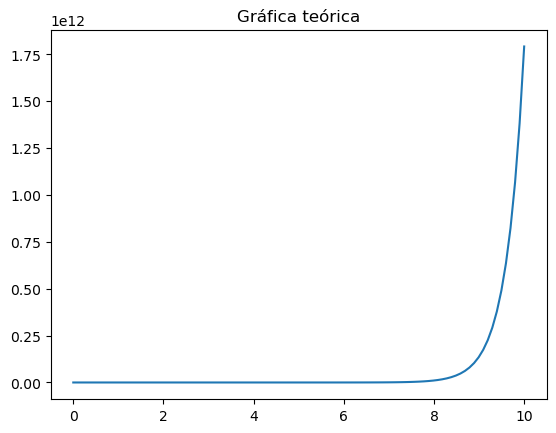

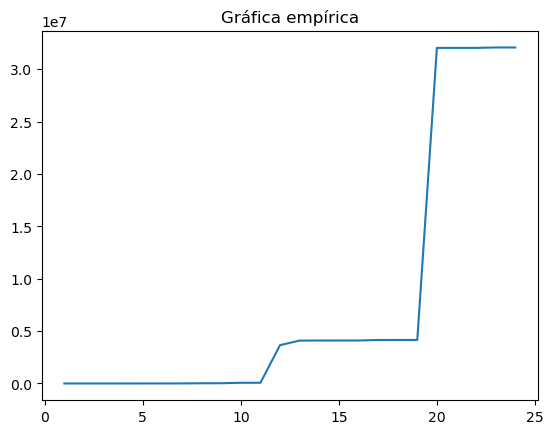

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random

times = 0

def f(m, n):
    return 13 * (m ** n) + 16

def canSum (targetSum, l):
    global times
    if targetSum == 0: 
        return times
    if targetSum < 0: 
        return times
    for i in l: 
        times += 1
        remainder = targetSum - i
        if canSum(remainder, l) == True:
            return times
    return times 

m = 13  

n_values = np.linspace(0, 10, 100) 
y_values = f(m, n_values)

plt.plot(n_values, y_values)

plt.title('Gráfica teórica')
plt.show()

a = 25
x = []
y = []
li = []

for i in range(1,a):
    value = random.randint(1,25)
    temp = random.randint(1,25)
    li.append(temp)
    x.append(i)
    y.append(canSum(value,li))

plt.plot(x,y)
plt.title('Gráfica empírica')
plt.show()



## Algoritmo recursivo para generar todos los subconjuntos de un conjunto dado

Este algoritmo genera los subconjuntos de un conjunto mediante generar los conjuntos sin el primer elemento, hasta llegar al conjunto vacío. Posterior a eso, se agrega el primer elemento a los que ya generamos y finalmente los combinamos las dos clases de subconjuntos.

La recursividad se usa para generar los subconjuntos sin el primer elemento y posterior a eso, los demás se generan con un bucle for.

In [2]:
def generar_subconjuntos(conjunto):
    # Caso base: si el conjunto está vacío, retornar un conjunto vacío
    if len(conjunto) == 0:  # 4
        return [[]] # 2
   
    # Llamada recursiva: generar subconjuntos sin el primer elemento
    subconjuntos = generar_subconjuntos(conjunto[1:]) # 3n (Cada llamada recursiva hace menor en 1 al arreglo
                                                      # a razón de n)
   
    # Agregar el primer elemento a cada subconjunto generado anteriormente
    subconjuntos_con_primero = [ [conjunto[0]] + subconjunto for subconjunto in subconjuntos ] 
    # Cada llamada recursiva llama a este ciclo, el genera 2^n subconjuntos en cada llamada, por lo que se multplica
    # por el anterior: 3n * 5(2^n+1)
   
    # Combinar los subconjuntos generados sin el primer elemento y los subconjuntos con el primer elemento
    return subconjuntos + subconjuntos_con_primero # 3
#Polinomio temporal: 15n * (2^n) 18n + 9 = O(n * 2^n)

print(generar_subconjuntos([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))

[[], [15], [14], [14, 15], [13], [13, 15], [13, 14], [13, 14, 15], [12], [12, 15], [12, 14], [12, 14, 15], [12, 13], [12, 13, 15], [12, 13, 14], [12, 13, 14, 15], [11], [11, 15], [11, 14], [11, 14, 15], [11, 13], [11, 13, 15], [11, 13, 14], [11, 13, 14, 15], [11, 12], [11, 12, 15], [11, 12, 14], [11, 12, 14, 15], [11, 12, 13], [11, 12, 13, 15], [11, 12, 13, 14], [11, 12, 13, 14, 15], [10], [10, 15], [10, 14], [10, 14, 15], [10, 13], [10, 13, 15], [10, 13, 14], [10, 13, 14, 15], [10, 12], [10, 12, 15], [10, 12, 14], [10, 12, 14, 15], [10, 12, 13], [10, 12, 13, 15], [10, 12, 13, 14], [10, 12, 13, 14, 15], [10, 11], [10, 11, 15], [10, 11, 14], [10, 11, 14, 15], [10, 11, 13], [10, 11, 13, 15], [10, 11, 13, 14], [10, 11, 13, 14, 15], [10, 11, 12], [10, 11, 12, 15], [10, 11, 12, 14], [10, 11, 12, 14, 15], [10, 11, 12, 13], [10, 11, 12, 13, 15], [10, 11, 12, 13, 14], [10, 11, 12, 13, 14, 15], [9], [9, 15], [9, 14], [9, 14, 15], [9, 13], [9, 13, 15], [9, 13, 14], [9, 13, 14, 15], [9, 12], [9, 

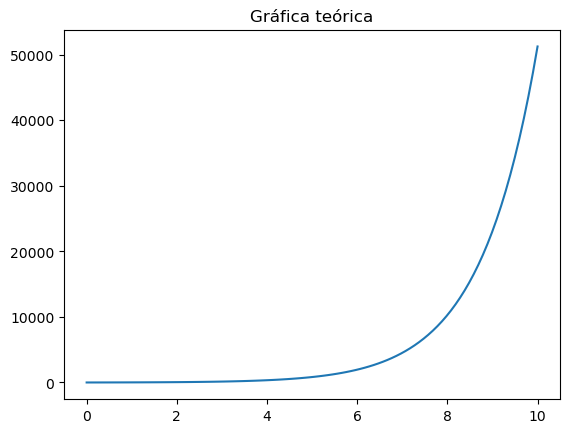

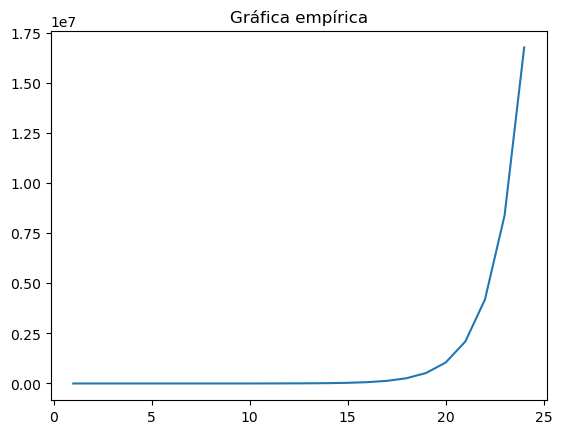

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(n):
    return 5* n * 2**n + 6*n + 3

times = 0

def generar_subconjuntos(conjunto):
    global times
    times += 1
    #print(times)
    if len(conjunto) == 0:
        return [[]]
    subconjuntos = generar_subconjuntos(conjunto[1:])
   
    subconjuntos_con_primero = [ [conjunto[0]] + subconjunto for subconjunto in subconjuntos ]
    times += len(subconjuntos_con_primero)
   
    return subconjuntos + subconjuntos_con_primero

n_values = np.linspace(0, 10, 100) 
y_values = f(n_values)

plt.plot(n_values, y_values)

plt.title('Gráfica teórica')
plt.show()

a = 25
x = []
y = []
l = []
for i in range(1,a):
    temp = random.randint(1,25)
    l.append(temp)
    #print(l)
    x.append(i)
    generar_subconjuntos(l)
    y.append(times)
    times = 0


plt.plot(x,y)
plt.title('Gráfica empírica')
plt.show()